Text(0.5, 1.0, 'Error relativo: $\\|x(t) - \\hat{x}(t)\\|/\\|x(t)\\|$')

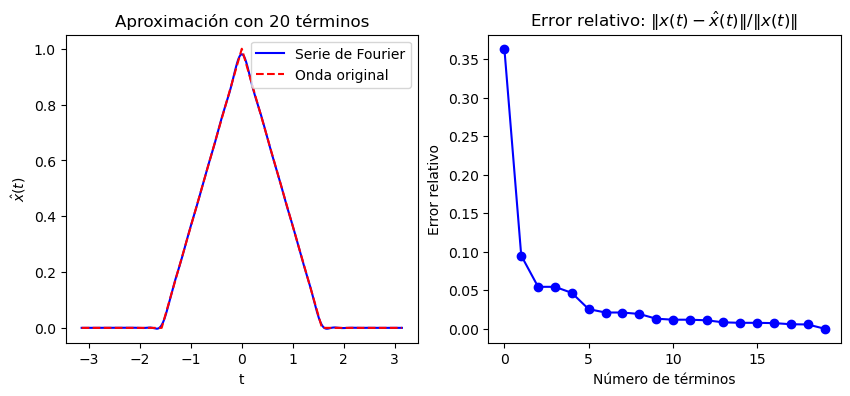

In [105]:
import numpy as np 
import matplotlib.pyplot as plt

dx = 0.001
T = 2*np.pi
w0 = 2*np.pi/T
t = np.arange(-T/2+dx,T/2 +dx ,dx)
n = len(t)
nquart = int(n/4)

# hat wave
x = np.zeros_like(t)
x[nquart:2*nquart] = (4/n) * np.arange(1,nquart+1) # Parte creciente
x[2*nquart:3*nquart] = np.ones(nquart) - (4/n) * np.arange(0, nquart) # Parte decreciente

k = 20
# Series de Fourier
A0 = np.sum(x)*dx*2/T
FS = (A0/2) 

A = np.zeros(k)
B = np.zeros(k)
error = np.zeros(k)

for n in range(1,k): 
    A[n-1] = (2/T) * np.sum(x*np.cos(t*n*w0))*dx # el 2pi/T es la frecuencia fundamental, en este caso vale 1 pero la dejo para que sea general
    B[n-1] = (2/T) * np.sum(x*np.sin(t*n*w0))*dx
    FS = FS + A[n-1]*np.cos(t*n*w0) + B[n-1]*np.sin(t*n*w0)
    error[n-1] = np.linalg.norm(x - FS)/np.linalg.norm(x)
    
fig, axes = plt.subplots(1,2, figsize=(10,4))
axes[0].plot(t,FS,'b-',label='Serie de Fourier')
axes[0].plot(t,x,'r--',label='Onda original')
axes[0].set_xlabel('t')
axes[0].set_ylabel(r'$\hat{x}(t)$')
axes[0].legend()
axes[0].set_title(f'Aproximación con {k} términos')

axes[1].plot(error,'bo-')
axes[1].set_xlabel('Número de términos')
axes[1].set_ylabel('Error relativo')
axes[1].set_title(r'Error relativo: $\|x(t) - \hat{x}(t)\|/\|x(t)\|$')

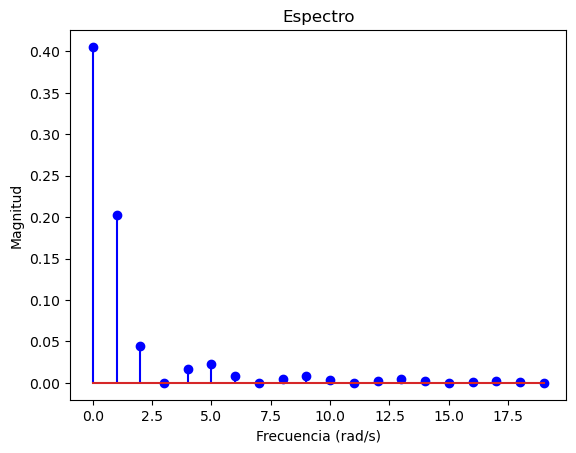

In [106]:
freqs = np.arange(0, k) * w0      # frecuencias
C = np.sqrt(A**2 + B**2)          # magnitudes

plt.stem(freqs, C, 'b')
plt.xlabel('Frecuencia (rad/s)')
plt.ylabel('Magnitud')
plt.title('Espectro')
plt.show()